In this project we will learn how to implement Gradient Descent, compute derivatives in sympy and plot several 2D visualizations.

The purpose of Gradient Descent is to identify minimum points in a function. Although it does not give the optimal solution, for large number of dimensions, computing derivatives is impossible and gradient descent provides handy solutions for these cases.

## Function and Its Derivative

We are given the function $f(x) = 3x^2 - 3x + 4$ We will translate this function and its derivative into code. the first derivative is $\frac{df}{dx} = 6x - 3$. Therefore $6x-3 = 0 -> x = 1/2$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
import sympy as sym

In [2]:
# First define the function
def fx(x):
    return 3*x**2 -3*x + 4

# define the function of the derivative
def deriv(x):
    return 6*x - 3

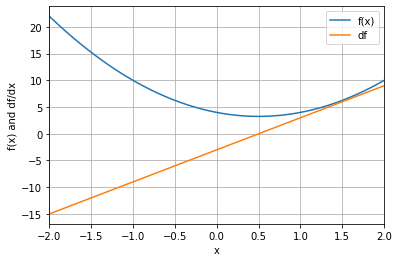

In [3]:
x = np.linspace(-2, 2, 2222)
# plot
plt.plot(x, fx(x), x, deriv(x))
plt.xlabel("x")
plt.ylabel("f(x) and df/dx")
plt.legend(["f(x)", "df"])
plt.grid("on")
plt.xlim([x[0],x[-1]])
plt.show()

## Implementing Gradient Descent

The algorithm for Grdient Descent can be summarizes ad follows:

1 - Intialize random local mimimum starting point

2 - Loop over training iterations (epochs)

2a - Compute the derivative at local minima

2b - Update the local minima as min itself minus derivative scaled by learning rate

2c - Store the derivative and local minimum on each iteration

There are two important patameters for GD: The number of iterations and the learning rate.

In [4]:
# Initialize a random point
localmin = np.random.choice(x,1)

# GD Parameters
learning_rate = 0.01
training_epochs = 100

# Training
for i in range(training_epochs):
    grad = deriv(localmin)
    localmin -= learning_rate*grad
localmin

array([0.49648747])

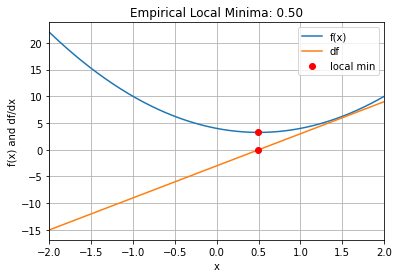

In [5]:
plt.plot(x, fx(x), x, deriv(x))
plt.plot(localmin, fx(localmin), "ro")
plt.plot(localmin, deriv(localmin), "ro")
plt.xlabel("x")
plt.ylabel("f(x) and df/dx")
plt.legend(["f(x)", "df", "local min"])
plt.title("Empirical Local Minima: %.2f"%localmin[0])
plt.grid("on")
plt.xlim([x[0],x[-1]])
plt.show()

/var/folders/wh/83kd80754n51v2m2g0jx2wynk10f9n/T/ipykernel_11027/152124775.py:2: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats("svg")


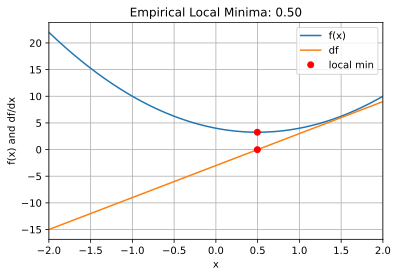

In [6]:
# Make the plot even better using ipython
display.set_matplotlib_formats("svg")
plt.plot(x, fx(x), x, deriv(x))
plt.plot(localmin, fx(localmin), "ro")
plt.plot(localmin, deriv(localmin), "ro")
plt.xlabel("x")
plt.ylabel("f(x) and df/dx")
plt.legend(["f(x)", "df", "local min"])
plt.title("Empirical Local Minima: %.2f"%localmin[0])
plt.grid("on")
plt.xlim([x[0],x[-1]])
plt.show()

In [7]:
# Store the model parameters at each iteration
# Initialize a random point
localmin = np.random.choice(x,1)

# GD Parameters
learning_rate = 0.01
training_epochs = 100

# Initilaize the outputs matrix
modelparams = np.zeros((training_epochs, 2))

# Training
for i in range(training_epochs):
    grad = deriv(localmin)
    localmin -= learning_rate*grad
    modelparams[i,:] = localmin,grad
localmin

/var/folders/wh/83kd80754n51v2m2g0jx2wynk10f9n/T/ipykernel_11027/3768092623.py:16: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  modelparams[i,:] = localmin,grad


array([0.49810842])

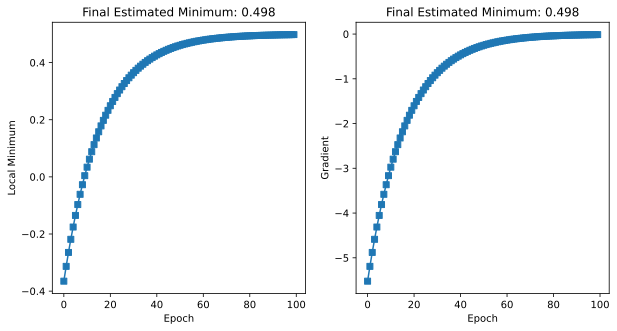

In [8]:
fig,ax = plt.subplots(1,2, figsize = (10,5))

for i in range(2):
    ax[i].plot(modelparams[:,i], "s-")
    ax[i].set_xlabel("Epoch")
    ax[i].set_title(f"Final Estimated Minimum: {localmin[0]:.3f}")
ax[0].set_ylabel("Local Minimum")
ax[1].set_ylabel("Gradient")
plt.show()

## Repeat the Same in 2D

In [9]:
# Create a function to plot the matpab surface
def peaks(x,y):
  # expand to a 2D mesh
  x,y = np.meshgrid(x,y)

  z = 3*(1-x)**2 * np.exp(-(x**2) - (y+1)**2) \
      - 10*(x/5 - x**3 - y**5) * np.exp(-x**2-y**2) \
      - 1/3*np.exp(-(x+1)**2 - y**2)
  return z

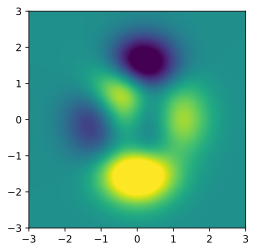

In [10]:
# Create and show the function
x = np.linspace(-3,3,201)
y = np.linspace(-3,3,201)

z = peaks(x,y)
plt.imshow(z, extent = [x[0],x[-1], y[0],y[-1]], 
           origin = "upper", vmin=-5, vmax = 5)
plt.show()

In [11]:
# Get Partial derivatives wrt x and y: Wrie the Symbolic Representation

sx, sy = sym.symbols("sx, sy")

sZ = 3*(1-sx)**2 * sym.exp(-(sx**2) - (sy+1)**2) \
      - 10*(sx/5 - sx**3 - sy**5) * sym.exp(-sx**2-sy**2) \
      - 1/3*sym.exp(-(sx+1)**2 - sy**2)

# Compute derivative
df_x = sym.lambdify((sx,sy), sym.diff(sZ, sx), "sympy")
df_y = sym.lambdify((sx,sy), sym.diff(sZ, sy), "sympy")

df_x(1,1).evalf()

-1.07369833656079

In [12]:
# Gradient Descent: Dimensionality doesnt matter
# Initialize a random point
localmin = [-.5, -1]
# GD Parameters
learning_rate = 0.01
training_epochs = 10000

# Initilaize the outputs matrix
modelparams = np.zeros((training_epochs, 2))

# Training
for i in range(training_epochs):
    dx = df_x(localmin[0], localmin[1])
    dy = df_y(localmin[0], localmin[1])
    grad = np.array([dx,dy])
    localmin = localmin - learning_rate*grad
    modelparams[i,:] = localmin

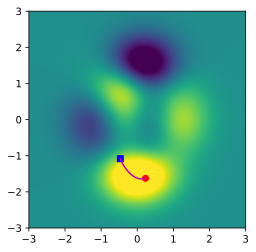

In [13]:
plt.imshow(z, extent = [x[0],x[-1], y[0],y[-1]], 
           origin = "upper", vmin=-5, vmax = 5)
plt.plot(modelparams[0,0], modelparams[0,1], "bs")
plt.plot(modelparams[-1,0], modelparams[-1,1], "ro")
plt.plot(modelparams[:,0], modelparams[:,1], "m")
plt.show()

## Bonus: Visualize in 3D

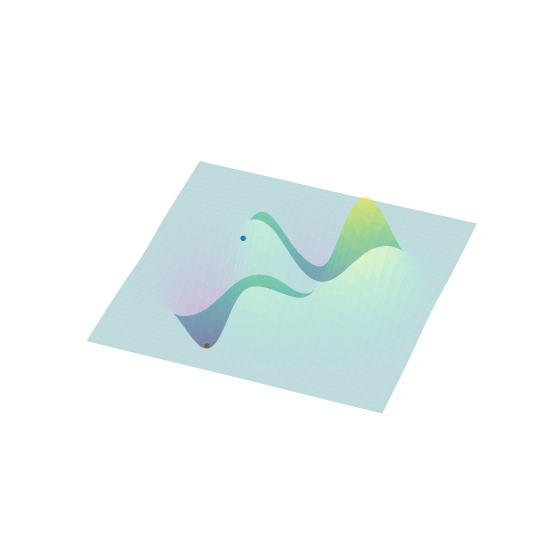

In [14]:
fig = plt.figure(figsize = (12,10))
ax = plt.axes(projection = "3d")

X,Y = np.meshgrid(x,y)

ax.plot_surface(X,Y,z, cmap = "viridis", alpha = 0.3)
ax.scatter(modelparams[0,0], modelparams[0,1],
          peaks(modelparams[0,0], modelparams[0,1]), "bs")
ax.scatter(modelparams[-1,0], modelparams[-1,1],
          peaks(modelparams[-1,0], modelparams[-1,1]), "ro")
ax.view_init(40,20)
ax.axis("off")
plt.show()